In [1]:
#Importing required libraries
import matplotlib.pyplot as plt
from PIL import Image
# import seaborn as sns
import numpy as np
import pandas as pd
import os
from tensorflow.keras.utils import to_categorical
from glob import glob
# start = time.time()
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
# end=time.time()
# print("The time of execution of above program is :",(end-start) * 10**3, "ms")
from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization,Conv2D, MaxPool2D
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
import tensorflow as tf
import pickle
import zlib
import pandas as pd
from sklearn.model_selection import train_test_split

/tmp/ipykernel_3995/3786660012.py:6: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
2024-03-25 12:56:46.439680: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-25 12:56:46.439886: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-25 12:56:46.707471: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable t

In [2]:
df = pd.read_csv('ISIC_2019_Training_Metadata.csv')
df.head()
# df.isna().sum()

,image,age_approx,anatom_site_general,lesion_id,sex
0,ISIC_0000000,55.0,anterior torso,NaN,female
1,ISIC_0000001,30.0,anterior torso,NaN,female
2,ISIC_0000002,60.0,upper extremity,NaN,female
3,ISIC_0000003,30.0,upper extremity,NaN,male
4,ISIC_0000004,80.0,posterior torso,NaN,male


In [3]:
dfy = pd.read_csv('ISIC_2019_Training_GroundTruth.csv')
dfy.head()

,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK
0,ISIC_0000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0000001,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0000002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0000003,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0000004,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
dfy.image.unique()

array(['ISIC_0000000', 'ISIC_0000001', 'ISIC_0000002', ...,
       'ISIC_0073249', 'ISIC_0073251', 'ISIC_0073254'], dtype=object)

In [5]:
# dfy.iloc[:,1:]
# array=np.array(dfy.iloc[:,1:])
# array
# dfy['encoded']=pd.Series(array)
# dfy.head()
# dfy.image.iloc[1000:1001].iloc[0]
# d={}
# for x in range(dfy.shape[0]+1):
#     # d[dfy.image.iloc[x:x+1].iloc[0]]=np.array(dfy.iloc[x:x+1,1:])
#     # if 'downsampled' in dfy.image.iloc[x:x+1].iloc[0]
#     print(dfy.image.iloc[x:x+1].iloc[0])

    

In [6]:

merged_df = pd.merge(df, dfy, on='image', how='inner')
merged_df.drop(columns='UNK',inplace=True)


In [7]:
lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}
# base_skin_dir = '../input/skin-cancer-mnist-ham10000'
# base_skin_dir=r"C:\Users\Melvin\Downloads\PROJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJ"
# base_skin_dir='/home/Melvin/Downloads/PROJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJ/HAM10000_images_part_2'
# Downloads/PROJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJ/HAM10000_images_part_1
# Merge images from both folders into one dictionary
# Image.open('/home/Melvin/Downloads/PROJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJ/HAM10000_images_part_1/ISIC_0026279.jpg')
base_skin_dir='/home/Melvin/Downloads/PROJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJ/ISIC_2019_Training_Input/'
imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x for x in glob(os.path.join(base_skin_dir, '*.jpg'))}
# base_skin_dir='/home/Melvin/Downloads/PROJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJ/HAM10000_images_part_2'
# imageid_path_dict.update({os.path.splitext(os.path.basename(x))[0]: x for x in glob(os.path.join(base_skin_dir, '*.jpg'))})
len(imageid_path_dict)
# imageid_path_dict

25331

In [8]:
# imageid_path_dict

In [9]:
merged_df['path'] = df['image'].map(imageid_path_dict.get)
merged_df[['path','image']].head(5)

,path,image
0,/home/Melvin/Downloads/PROJJJJJJJJJJJJJJJJJJJJ...,ISIC_0000000
1,/home/Melvin/Downloads/PROJJJJJJJJJJJJJJJJJJJJ...,ISIC_0000001
2,/home/Melvin/Downloads/PROJJJJJJJJJJJJJJJJJJJJ...,ISIC_0000002
3,/home/Melvin/Downloads/PROJJJJJJJJJJJJJJJJJJJJ...,ISIC_0000003
4,/home/Melvin/Downloads/PROJJJJJJJJJJJJJJJJJJJJ...,ISIC_0000004


In [10]:
merged_df.head()

,image,age_approx,anatom_site_general,lesion_id,sex,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,path
0,ISIC_0000000,55.0,anterior torso,NaN,female,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,/home/Melvin/Downloads/PROJJJJJJJJJJJJJJJJJJJJ...
1,ISIC_0000001,30.0,anterior torso,NaN,female,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,/home/Melvin/Downloads/PROJJJJJJJJJJJJJJJJJJJJ...
2,ISIC_0000002,60.0,upper extremity,NaN,female,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,/home/Melvin/Downloads/PROJJJJJJJJJJJJJJJJJJJJ...
3,ISIC_0000003,30.0,upper extremity,NaN,male,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,/home/Melvin/Downloads/PROJJJJJJJJJJJJJJJJJJJJ...
4,ISIC_0000004,80.0,posterior torso,NaN,male,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,/home/Melvin/Downloads/PROJJJJJJJJJJJJJJJJJJJJ...


In [11]:
merged_df['path'] = merged_df['image'].map(imageid_path_dict.get)
# merged_df['cell_type'] = df['dx'].map(lesion_type_dict.get) 
# df['cell_type_idx'] = pd.Categorical(df['cell_type']).codes #      id for each cell type 

In [12]:
merged_df['image'] = merged_df['path'].map(lambda x: np.asarray(Image.open(x).resize((100,100))))


In [13]:
df=merged_df[['image','MEL','NV','BCC','AK','BKL','DF','VASC','SCC']]
df

,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC
0,"[[[161, 189, 223], [156, 192, 230], [158, 199,...",0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"[[[147, 146, 153], [142, 140, 147], [148, 145,...",0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"[[[44, 44, 44], [26, 26, 26], [27, 27, 27], [2...",1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"[[[227, 226, 232], [224, 223, 227], [223, 223,...",0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"[[[42, 42, 42], [24, 24, 24], [25, 25, 25], [2...",1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
25326,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
25327,"[[[90, 85, 88], [94, 88, 92], [100, 94, 98], [...",0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
25328,"[[[127, 125, 127], [130, 127, 130], [131, 128,...",1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25329,"[[[139, 118, 132], [140, 118, 133], [142, 119,...",0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# basal cell carcinoma,
# melanoma, 
# actinic keratosis,
# squamous cell carcinoma,
# dermatofibroma,
# vascular lesion
# nevis,  

# seborrheic keratosis, 
 
 

    

In [15]:
x_train=merged_df.loc[:,['image']]

In [16]:
y_train=np.array(merged_df.loc[:,['MEL','NV','BCC','AK','BKL','DF','VASC','SCC']])
y_train[0:5]

array([[0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.]])

In [17]:
x_train, x_validate, y_train,y_validate = train_test_split(x_train, y_train, test_size=0.05,random_state=333)

In [18]:
x_train=x_train['image']
# x_test=x_test['image']
x_validate=x_validate['image']

In [19]:
x_train=x_train/255
x_validate=x_validate/255
# x_test=x_test/255

In [20]:
import gc
gc.collect()

0

In [21]:
# x_train1, x_train2 y_train1,y_train2 = train_test_split(x_train, y_train, test_size=0.5,random_state=333)

In [22]:
x_train=tf.convert_to_tensor(x_train.tolist(), dtype=tf.float32)

2024-03-25 13:04:20.965343: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-25 13:04:22.242826: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-25 13:04:22.243599: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [23]:
# x_train2=tf.convert_to_tensor(x_train2.tolist(), dtype=tf.float32)

In [24]:
x_validate=tf.convert_to_tensor(x_validate.tolist(),dtype=tf.float32)

2024-03-25 13:07:12.562048: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 152040000 exceeds 10% of free system memory.


In [25]:
y_train=tf.convert_to_tensor(y_train.tolist(), dtype=tf.float32)

In [26]:
# y_train2=tf.convert_to_tensor(y_train2.tolist(), dtype=tf.float32)

In [27]:
y_validate=tf.convert_to_tensor(y_validate.tolist(), dtype=tf.float32)

In [28]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=90,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.12,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.12,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True)  # randomly flip images
datagen.fit(x_train)

2024-03-25 13:07:22.019894: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 2887680000 exceeds 10% of free system memory.


In [29]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.applications import ResNet50, InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import SGD

In [30]:
# x_train.shape   TensorShape([24064, 100, 100, 3])
y_train.shape

TensorShape([24064, 8])

Epoch 1/100
376/376 [==============================] - 1306s 3s/step - loss: 1.0471 - accuracy: 0.6305 - val_loss: 2.1899 - val_accuracy: 0.5217
Epoch 2/100
376/376 [==============================] - 1290s 3s/step - loss: 0.8654 - accuracy: 0.6883 - val_loss: 1.4940 - val_accuracy: 0.5138
Epoch 3/100
376/376 [==============================] - 1286s 3s/step - loss: 0.7913 - accuracy: 0.7152 - val_loss: 0.9338 - val_accuracy: 0.6630
Epoch 4/100
376/376 [==============================] - 1288s 3s/step - loss: 0.7346 - accuracy: 0.7288 - val_loss: 0.9808 - val_accuracy: 0.6606
Epoch 5/100
376/376 [==============================] - 1287s 3s/step - loss: 0.6874 - accuracy: 0.7498 - val_loss: 0.9078 - val_accuracy: 0.6898
Epoch 6/100
376/376 [==============================] - 1285s 3s/step - loss: 0.6524 - accuracy: 0.7583 - val_loss: 0.7697 - val_accuracy: 0.7159
Epoch 7/100
376/376 [==============================] - 1286s 3s/step - loss: 0.6189 - accuracy: 0.7734 - val_loss: 0.8469 - val_ac

/home/Melvin/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


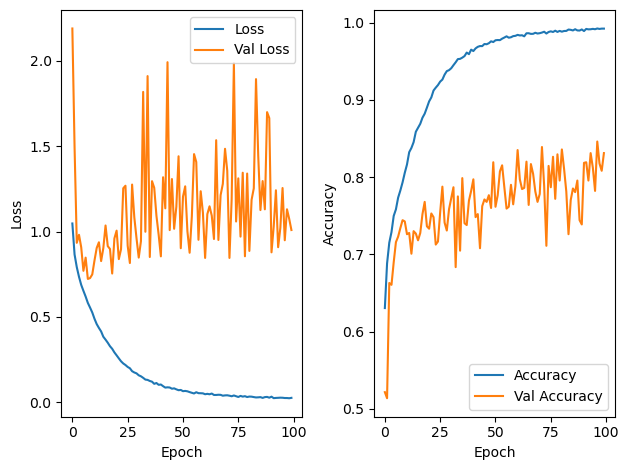

In [37]:
resnet_base = ResNet50(include_top=False, weights='imagenet', input_shape=(100, 100, 3))

# for layer in resnet_base.layers[:int(len(resnet_base.layers)*0.5)]:
#     layer.trainable=False
# for layer in resnet_base.layers[int(len(resnet_base.layers)*0.5):]:
#     layer.trainable=True
resnet_base.trainable = True
resnet50model= tf.keras.Sequential([
        resnet_base,
        Conv2D(filters=100, kernel_size=(3, 3), activation='relu', padding='same'),  # Example convolution layer
        Conv2D(filters=200, kernel_size=(3, 3), activation='relu', padding='same'),  # Example convolution layer
        Conv2D(filters=300, kernel_size=(3, 3), activation='relu', padding='same'),  # Example convolution layer
        Flatten(),
        Dense(1000, activation='relu'),
        Dense(500, activation='relu'),
        Dense(100, activation='relu'),
        Dense(8, activation='softmax')
])
resnet50model.compile('sgd', loss='categorical_crossentropy', metrics=['accuracy'])
# resnet50model_history=resnet50model.fit(datagen.flow(x_train,y_train, batch_size=32), epochs=30, validation_data=(x_validate,y_validate))
resnet50model_history=resnet50model.fit(datagen.flow(x_train,y_train, batch_size=64), epochs=100, validation_data=(x_validate,y_validate))
resnet50model.save('resnet50model__trainable.h5')
# with open('transfer_learning_resnet50model_50%_trainable_history.pkl','wb') as f:
#     pickle.dump(resnet50model_history.history,f)
import matplotlib.pyplot as plt

plt.subplot(1,2,1)
plt.plot(resnet50model_history.history['loss'],label='Loss')
plt.plot(resnet50model_history.history['val_loss'],label='Val Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(resnet50model_history.history['accuracy'],label='Accuracy')
plt.plot(resnet50model_history.history['val_accuracy'],label='Val Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.tight_layout()  # Adjust subplots to prevent overlap
plt.show()

In [31]:
dd={
0:[1., 0., 0., 0., 0., 0., 0., 0.],
1:[0., 1., 0., 0., 0., 0., 0., 0.],
2:[0., 0., 1., 0., 0., 0., 0., 0.],
3:[0., 0., 0., 1., 0., 0., 0., 0.],
4:[0., 0., 0., 0., 1., 0., 0., 0.],
5:[0., 0., 0., 0., 0., 1., 0., 0.],
6:[0., 0., 0., 0., 0., 0., 1., 0.],
7:[0., 0., 0., 0., 0., 0., 0., 1.],

}

In [32]:
# MEL 	NV 	BCC 	AK 	BKL 	DF 	VASC 	SCC

# # basal cell carcinoma,
# # melanoma, 
# # actinic keratosis,
# # squamous cell carcinoma,
# # dermatofibroma,
# # vascular lesion
# # nevis,  

# # seborrheic keratosis, 

In [33]:
labels={0:'Melanoma',
       1:'Nevis',
       2:'Basal cell carcinoma',
       3:'Actinic Keratosis',
       4:'seborrheic keratosis',
       5:'Dermatofibroma',
       6:'Vascular lesions',
       7:'Squamous cell carcinoma'
       }
class_labels=['Melanoma',
        'Nevis',
       'Basal cell carcinoma',
       'Actinic Keratosis',
       'seborrheic keratosis',
       'Dermatofibroma',
       'Vascular lesions',
       'Squamous cell carcinoma']

In [35]:
# from sklearn.metrics import accuracy_score
# l=[]
# y_p=resnet50model.predict(x_test)
# y_p=np.argmax(y_p, axis=1)
# l=[]
# for x in y_p:
#     l.append(dd[x])
# l
# # y_p=y_p.map(dd)
# print(accuracy_score(y_test,l))
# from sklearn.metrics import precision_score
# import seaborn as sns
# y_t_classes=y_test
# y_p_classes=l

# precision = precision_score(y_t_classes, y_p_classes, average='macro')  # Use 'macro' for multi-class classification
# print("Precision:", precision)

# from sklearn.metrics import recall_score

# recall = recall_score(y_t_classes, y_p_classes, average='macro')  # Use 'macro' for multi-class classification
# print("Recall:", recall)


# from sklearn.metrics import f1_score

# f1 = f1_score(y_t_classes, y_p_classes, average='macro')  # Use 'macro' for multi-class classification
# print("F1 Score:", f1)


# from sklearn.metrics import confusion_matrix
# y_p_classes = np.argmax(l, axis=1)
# y_t_classes=np.argmax(y_test, axis=1)
# cm = confusion_matrix(y_t_classes, y_p_classes)
# print("Confusion Matrix:")
# print(cm)


# from sklearn.metrics import classification_report

# report = classification_report(y_t_classes, y_p_classes)
# print("Classification Report:")
# print(report)


# cm = confusion_matrix(y_t_classes, y_p_classes)

# # Plot confusion matrix
# plt.figure(figsize=(10, 8))
# # sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.title('Confusion Matrix')
# plt.show()


Epoch 1/100
752/752 [==============================] - 63s 66ms/step - loss: 1.5124 - accuracy: 0.5069 - val_loss: 1.3274 - val_accuracy: 0.5217
Epoch 2/100
752/752 [==============================] - 48s 63ms/step - loss: 1.2252 - accuracy: 0.5456 - val_loss: 1.1405 - val_accuracy: 0.5904
Epoch 3/100
752/752 [==============================] - 48s 63ms/step - loss: 1.1140 - accuracy: 0.6024 - val_loss: 1.0795 - val_accuracy: 0.6109
Epoch 4/100
752/752 [==============================] - 48s 64ms/step - loss: 1.0718 - accuracy: 0.6169 - val_loss: 1.0490 - val_accuracy: 0.6480
Epoch 5/100
752/752 [==============================] - 48s 64ms/step - loss: 1.0495 - accuracy: 0.6293 - val_loss: 1.0014 - val_accuracy: 0.6598
Epoch 6/100
752/752 [==============================] - 48s 64ms/step - loss: 1.0258 - accuracy: 0.6389 - val_loss: 1.0071 - val_accuracy: 0.6354
Epoch 7/100
752/752 [==============================] - 48s 64ms/step - loss: 1.0015 - accuracy: 0.6486 - val_loss: 0.9634 - val_ac

/home/Melvin/anaconda3/envs/ml/lib/python3.9/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


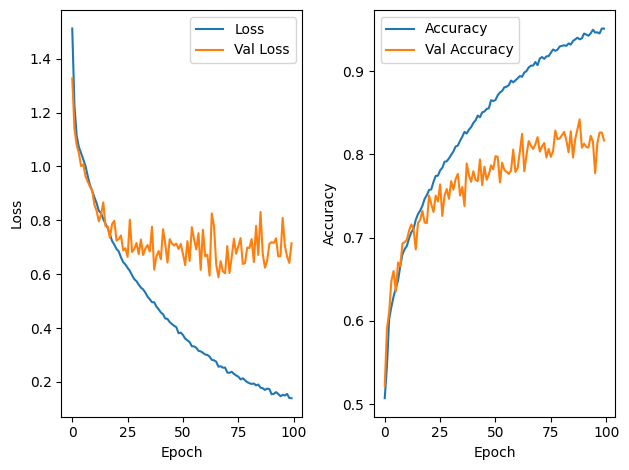

In [36]:
inception_l = InceptionV3(include_top=False, weights='imagenet', input_shape=(100, 100, 3))
# for layer in inception_l.layers[:int(len(inception_l.layers)*0.75)]:
#     layer.trainable=False
# for layer in inception_l.layers[int(len(inception_l.layers)*0.75):]:
#     layer.trainable=True
inception_l.trainable=True

inception=tf.keras.Sequential([
        inception_l,
        Conv2D(filters=100, kernel_size=(3, 3), activation='relu', padding='same'),  # Example convolution layer
        Conv2D(filters=200, kernel_size=(3, 3), activation='relu', padding='same'),  # Example convolution layer
        Conv2D(filters=300, kernel_size=(3, 3), activation='relu', padding='same'),  # Example convolution layer
        Flatten(),
        Dense(1000, activation='relu'),
        Dense(500, activation='relu'),
        Dense(100, activation='relu'),
        Dense(8, activation='softmax')
])
inception.compile('sgd', loss='categorical_crossentropy', metrics=['accuracy'])

inception_history=inception.fit(datagen.flow(x_train,y_train, batch_size=32), epochs=100, validation_data=(x_validate,y_validate))
inception.save('inception_trainable.keras')
# with open('transfer_learning_inception_50%_trainable_history.pkl','wb') as f:
#     pickle.dump(inception_history.history,f)
import matplotlib.pyplot as plt
plt.subplot(1,2,1)
plt.plot(inception_history.history['loss'],label='Loss')
plt.plot(inception_history.history['val_loss'],label='Val Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(inception_history.history['accuracy'],label='Accuracy')
plt.plot(inception_history.history['val_accuracy'],label='Val Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.tight_layout()  # Adjust subplots to prevent overlap
plt.show()

In [ ]:
# inception.save('inception_trainable.keras')
# # with open('transfer_learning_inception_50%_trainable_history.pkl','wb') as f:
# #     pickle.dump(inception_history.history,f)
# import matplotlib.pyplot as plt
# plt.subplot(1,2,1)
# plt.plot(inception_history.history['loss'],label='Loss')
# plt.plot(inception_history.history['val_loss'],label='Val Loss')
# plt.xlabel("Epoch")
# plt.ylabel("Loss")
# plt.legend()

# plt.subplot(1,2,2)
# plt.plot(inception_history.history['accuracy'],label='Accuracy')
# plt.plot(inception_history.history['val_accuracy'],label='Val Accuracy')
# plt.xlabel("Epoch")
# plt.ylabel("Accuracy")
# plt.legend()
# plt.tight_layout()  # Adjust subplots to prevent overlap
# plt.show()

In [ ]:
# y_p=inception.predict(x_test)
# y_p=np.argmax(y_p, axis=1)
# l=[]
# for x in y_p:
#     l.append(dd[x])
# l
# # y_p=y_p.map(dd)
# print(accuracy_score(y_test,l))
# from sklearn.metrics import precision_score
# y_t_classes=y_test
# y_p_classes=l

# precision = precision_score(y_t_classes, y_p_classes, average='macro')  # Use 'macro' for multi-class classification
# print("Precision:", precision)

# from sklearn.metrics import recall_score

# recall = recall_score(y_t_classes, y_p_classes, average='macro')  # Use 'macro' for multi-class classification
# print("Recall:", recall)


# from sklearn.metrics import f1_score

# f1 = f1_score(y_t_classes, y_p_classes, average='macro')  # Use 'macro' for multi-class classification
# print("F1 Score:", f1)


# from sklearn.metrics import confusion_matrix
# y_p_classes = np.argmax(l, axis=1)
# y_t_classes=np.argmax(y_test, axis=1)
# cm = confusion_matrix(y_t_classes, y_p_classes)
# print("Confusion Matrix:")
# print(cm)


# from sklearn.metrics import classification_report

# report = classification_report(y_t_classes, y_p_classes)
# print("Classification Report:")
# print(report)

# cm = confusion_matrix(y_t_classes, y_p_classes)

# # Plot confusion matrix
# plt.figure(figsize=(10, 8))
# # sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.title('Confusion Matrix')
# plt.show()


Epoch 1/100


2024-03-25 14:31:43.344897: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_2/efficientnetb0/block2b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


752/752 [==============================] - 60s 59ms/step - loss: 1.1633 - accuracy: 0.5895 - val_loss: 5.7519 - val_accuracy: 0.4546
Epoch 2/100
752/752 [==============================] - 45s 59ms/step - loss: 1.0076 - accuracy: 0.6471 - val_loss: 1.5494 - val_accuracy: 0.5114
Epoch 3/100
752/752 [==============================] - 49s 65ms/step - loss: 0.9329 - accuracy: 0.6669 - val_loss: 1.5180 - val_accuracy: 0.5217
Epoch 4/100
752/752 [==============================] - 49s 65ms/step - loss: 0.8943 - accuracy: 0.6781 - val_loss: 231.2773 - val_accuracy: 0.4917
Epoch 5/100
752/752 [==============================] - 45s 59ms/step - loss: 0.8663 - accuracy: 0.6862 - val_loss: 1.6942 - val_accuracy: 0.5233
Epoch 6/100
752/752 [==============================] - 47s 62ms/step - loss: 0.8526 - accuracy: 0.6916 - val_loss: 1.4961 - val_accuracy: 0.5193
Epoch 7/100
752/752 [==============================] - 44s 59ms/step - loss: 0.8057 - accuracy: 0.7080 - val_loss: 240.8351 - val_accuracy: 

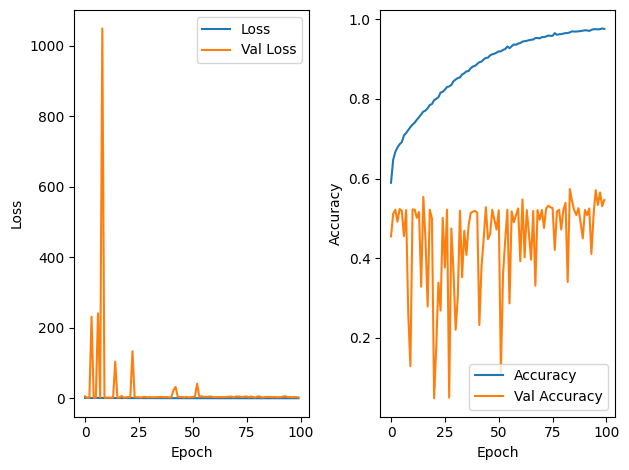

In [37]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model

# Load pre-trained EfficientNetB0 model
efficientnet_layer = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(100, 100, 3))

# Freeze the base model layers
efficientnet_layer.trainable = True

# Add custom classification head
efficientnet_model=tf.keras.Sequential([
        efficientnet_layer,
        Conv2D(filters=100, kernel_size=(3, 3), activation='relu', padding='same'),  # Example convolution layer
        Conv2D(filters=200, kernel_size=(3, 3), activation='relu', padding='same'),  # Example convolution layer
        Conv2D(filters=300, kernel_size=(3, 3), activation='relu', padding='same'),  # Example convolution layer
        Flatten(),
        Dense(1000, activation='relu'),
        Dense(500, activation='relu'),
        Dense(100, activation='relu'),
        Dense(8, activation='softmax')
])
efficientnet_model.compile('sgd', loss='categorical_crossentropy', metrics=['accuracy'])

efficientnet_model_history=efficientnet_model.fit(datagen.flow(x_train,y_train, batch_size=32), epochs=100, validation_data=(x_validate,y_validate))
efficientnet_model.save('efficient_trainable.keras')
# with open('transfer_learning_efficient_trainable_history.pkl','wb') as f:
#     pickle.dump(efficientnet_model_history.history,f)
import matplotlib.pyplot as plt
plt.subplot(1,2,1)
plt.plot(efficientnet_model_history.history['loss'],label='Loss')
plt.plot(efficientnet_model_history.history['val_loss'],label='Val Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(efficientnet_model_history.history['accuracy'],label='Accuracy')
plt.plot(efficientnet_model_history.history['val_accuracy'],label='Val Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.tight_layout()  # Adjust subplots to prevent overlap
plt.show()





In [ ]:
# efficientnet_model.save('efficient_trainable.keras')
# # with open('transfer_learning_efficient_trainable_history.pkl','wb') as f:
# #     pickle.dump(efficientnet_model_history.history,f)
# import matplotlib.pyplot as plt
# plt.subplot(1,2,1)
# plt.plot(efficientnet_model_history.history['loss'],label='Loss')
# plt.plot(efficientnet_model_history.history['val_loss'],label='Val Loss')
# plt.xlabel("Epoch")
# plt.ylabel("Loss")
# plt.legend()

# plt.subplot(1,2,2)
# plt.plot(efficientnet_model_history.history['accuracy'],label='Accuracy')
# plt.plot(efficientnet_model_history.history['val_accuracy'],label='Val Accuracy')
# plt.xlabel("Epoch")
# plt.ylabel("Accuracy")
# plt.legend()
# plt.tight_layout()  # Adjust subplots to prevent overlap
# plt.show()


In [38]:
# y_p=efficientnet_model.predict(x_test)
# y_p=np.argmax(y_p, axis=1)
# l=[]
# for x in y_p:
#     l.append(dd[x])
# l
# # y_p=y_p.map(dd)
# print(accuracy_score(y_test,l))
# from sklearn.metrics import precision_score
# y_t_classes=y_test
# y_p_classes=l

# precision = precision_score(y_t_classes, y_p_classes, average='macro')  # Use 'macro' for multi-class classification
# print("Precision:", precision)

# from sklearn.metrics import recall_score

# recall = recall_score(y_t_classes, y_p_classes, average='macro')  # Use 'macro' for multi-class classification
# print("Recall:", recall)


# from sklearn.metrics import f1_score

# f1 = f1_score(y_t_classes, y_p_classes, average='macro')  # Use 'macro' for multi-class classification
# print("F1 Score:", f1)


# from sklearn.metrics import confusion_matrix
# y_p_classes = np.argmax(l, axis=1)
# y_t_classes=np.argmax(y_test, axis=1)
# cm = confusion_matrix(y_t_classes, y_p_classes)
# print("Confusion Matrix:")
# print(cm)


# from sklearn.metrics import classification_report

# report = classification_report(y_t_classes, y_p_classes)
# print("Classification Report:")
# print(report)

# cm = confusion_matrix(y_t_classes, y_p_classes)

# # Plot confusion matrix
# plt.figure(figsize=(10, 8))
# # sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.title('Confusion Matrix')
# plt.show()


Epoch 1/100
752/752 [==============================] - 53s 54ms/step - loss: 1.2162 - accuracy: 0.5716 - val_loss: 1.1424 - val_accuracy: 0.5848
Epoch 2/100
752/752 [==============================] - 40s 54ms/step - loss: 1.0188 - accuracy: 0.6345 - val_loss: 0.9527 - val_accuracy: 0.6496
Epoch 3/100
752/752 [==============================] - 41s 54ms/step - loss: 0.9417 - accuracy: 0.6622 - val_loss: 0.8751 - val_accuracy: 0.6827
Epoch 4/100
752/752 [==============================] - 41s 54ms/step - loss: 0.8988 - accuracy: 0.6768 - val_loss: 0.8831 - val_accuracy: 0.6827
Epoch 5/100
752/752 [==============================] - 40s 54ms/step - loss: 0.8608 - accuracy: 0.6880 - val_loss: 0.8107 - val_accuracy: 0.6906
Epoch 6/100
752/752 [==============================] - 41s 54ms/step - loss: 0.8364 - accuracy: 0.6982 - val_loss: 0.7570 - val_accuracy: 0.7096
Epoch 7/100
752/752 [==============================] - 41s 55ms/step - loss: 0.8142 - accuracy: 0.7038 - val_loss: 0.8597 - val_ac

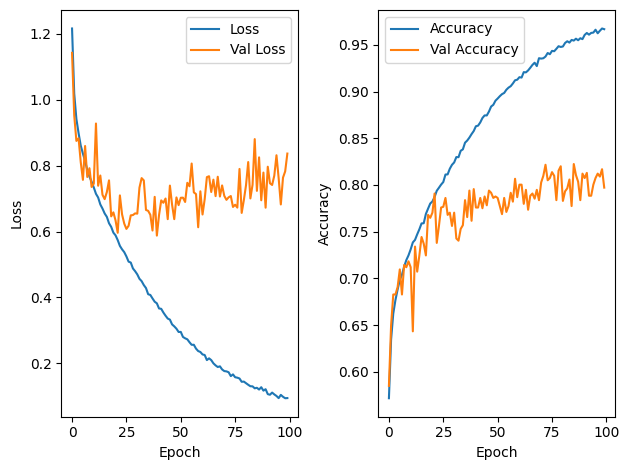

In [39]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model

# Load pre-trained VGG19 model
vgg_l = VGG19(weights='imagenet', include_top=False, input_shape=(100, 100, 3))


# Freeze the base model layers
vgg_l.trainable = True

# Add custom classification head
vgg_model=tf.keras.Sequential([
        vgg_l,
        Conv2D(filters=100, kernel_size=(3, 3), activation='relu', padding='same'),  # Example convolution layer
        Conv2D(filters=200, kernel_size=(3, 3), activation='relu', padding='same'),  # Example convolution layer
        Conv2D(filters=300, kernel_size=(3, 3), activation='relu', padding='same'),  # Example convolution layer
        Flatten(),
        Dense(1000, activation='relu'),
        Dense(500, activation='relu'),
        Dense(100, activation='relu'),
        Dense(8, activation='softmax')
])
vgg_model.compile('sgd', loss='categorical_crossentropy', metrics=['accuracy'])

vgg_model_history=vgg_model.fit(datagen.flow(x_train,y_train, batch_size=32), epochs=100, validation_data=(x_validate,y_validate))
vgg_model.save('vgg_trainable.h5')
# with open('transfer_learning_vgg_trainable_history.pkl','wb') as f:
#     pickle.dump(vgg_model_history.history,f)
import matplotlib.pyplot as plt
plt.subplot(1,2,1)
plt.plot(vgg_model_history.history['loss'],label='Loss')
plt.plot(vgg_model_history.history['val_loss'],label='Val Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(vgg_model_history.history['accuracy'],label='Accuracy')
plt.plot(vgg_model_history.history['val_accuracy'],label='Val Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.tight_layout()  # Adjust subplots to prevent overlap
plt.show()


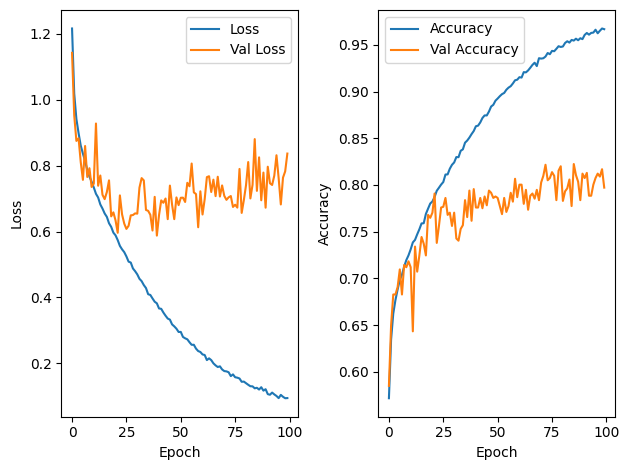

In [42]:
# vgg_model.save('vgg_trainable.h5')
# # with open('transfer_learning_vgg_trainable_history.pkl','wb') as f:
# #     pickle.dump(vgg_model_history.history,f)
# import matplotlib.pyplot as plt
# plt.subplot(1,2,1)
# plt.plot(vgg_model_history.history['loss'],label='Loss')
# plt.plot(vgg_model_history.history['val_loss'],label='Val Loss')
# plt.xlabel("Epoch")
# plt.ylabel("Loss")
# plt.legend()

# plt.subplot(1,2,2)
# plt.plot(vgg_model_history.history['accuracy'],label='Accuracy')
# plt.plot(vgg_model_history.history['val_accuracy'],label='Val Accuracy')
# plt.xlabel("Epoch")
# plt.ylabel("Accuracy")
# plt.legend()
# plt.tight_layout()  # Adjust subplots to prevent overlap
# plt.show()
# # loaded_model = tf.keras.saving.load_model("model.keras")


In [40]:
# y_p=vgg_model.predict(x_test)
# y_p=np.argmax(y_p, axis=1)
# l=[]
# for x in y_p:
#     l.append(dd[x])
# l
# # y_p=y_p.map(dd)
# print(accuracy_score(y_test,l))
# from sklearn.metrics import precision_score
# y_t_classes=y_test
# y_p_classes=l

# precision = precision_score(y_t_classes, y_p_classes, average='macro')  # Use 'macro' for multi-class classification
# print("Precision:", precision)

# from sklearn.metrics import recall_score

# recall = recall_score(y_t_classes, y_p_classes, average='macro')  # Use 'macro' for multi-class classification
# print("Recall:", recall)


# from sklearn.metrics import f1_score

# f1 = f1_score(y_t_classes, y_p_classes, average='macro')  # Use 'macro' for multi-class classification
# print("F1 Score:", f1)


# from sklearn.metrics import confusion_matrix
# y_p_classes = np.argmax(l, axis=1)
# y_t_classes=np.argmax(y_test, axis=1)
# cm = confusion_matrix(y_t_classes, y_p_classes)
# print("Confusion Matrix:")
# print(cm)


# from sklearn.metrics import classification_report

# report = classification_report(y_t_classes, y_p_classes)
# print("Classification Report:")
# print(report)

# cm = confusion_matrix(y_t_classes, y_p_classes)

# # Plot confusion matrix
# plt.figure(figsize=(10, 8))
# # sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.title('Confusion Matrix')
# plt.show()
